In [1]:
from selenium import webdriver

driver = webdriver.Chrome(r"C:\Users\jaehy\Downloads\driver\chromedriver.exe")

C:\Users\jaehy\AppData\Local\Temp/ipykernel_4508/1756175631.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:\Users\jaehy\Downloads\driver\chromedriver.exe")


In [2]:
main_url = "https://movie.daum.net/moviedb/grade?movieId=115112"
driver.get(main_url)

# 1번 영화 리뷰 가져오기

## 교수님께서 정해주신 최대 댓글 5000개 미만이기 때문에 전체 댓글을 끝까지 긁어올 수 있도록 더보기를 클릭하도록 했다. 

### 전체 평가 글 1254개

In [3]:
import time
time.sleep(3)
while True:
    try:
        more_xpath = '//*[@id="alex-area"]/div/div/div/div[3]/div[1]/button'
        driver.find_element('xpath', more_xpath).click()
        time.sleep(3)
    except:
        break

## BeautifulSoup 이용하여 위의 Selenium작업이 수행된 페이지를 받아서 원하는 부분을 크롤링

In [135]:
from bs4 import BeautifulSoup

html = driver.page_source
cnt_neg = 0
cnt_pos = 0

soup = BeautifulSoup(html, 'html.parser')
evaluations = soup.find_all('div', {'class':'cmt_info'})
# print(evaluations)
evaluation_lists = []
for evaluation in evaluations:
    if evaluation.find('p') is not None:
        comment = evaluation.find('p').text.strip(' \n')
        point = int(evaluation.find('div').text.strip(' \n'))
        
        if point == 10:
            if cnt_pos < 200:
                label = 'pos'
                evaluation_lists.append((comment, label))
                cnt_pos += 1
        elif point < 6:
            if cnt_neg <=200:
                label = 'neg'
                evaluation_lists.append((comment, label))
                cnt_neg += 1

In [136]:
# print(evaluation_lists)

평가와 평점을 크롤링 해오면서 평점이 __7점 이상인 평은 긍정 리뷰__로, __7점 미만인 평은 부정 리뷰__로 바로 나눠서 evaluation_lists에 저장되도록 했다.

In [137]:
len(neg_comment)

191

In [138]:
len(pos_comment)

200

In [139]:
len(evaluation_lists)

391

---

# 2번 워드 클라우드 그리기~

In [140]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
okt = Okt()

전체 리뷰는 all_comment, 긍정 리뷰는 pos_comment, 부정 리뷰는 neg_comment에 저장하도록 했다.

In [141]:
all_comment = []
pos_comment = []
neg_comment = []

for comment in evaluation_lists:
    all_comment.append(comment[0])
    if comment[1] == 'pos':
        pos_comment.append(comment[0])
    else:
        neg_comment.append(comment[0])
        
# print(all_comment[:5])

### 워드 클라우드를 그리기 위해 각 문장들을 합쳐서 하나의 문장으로 join시키고 명사들만 리스트에 남겼다.

### 워드 클라우드를 그리기 위해 각 리뷰 리스트들을 Counter를 이용해 개수 파악을 했다.

In [8]:
all_doc = '\n'.join(all_comment)
all_doc_noun = okt.nouns(all_doc)
all_count = Counter(all_doc_noun)

pos_doc = '\n'.join(pos_comment)
pos_doc_noun = okt.nouns(pos_doc)
pos_count = Counter(pos_doc_noun)

neg_doc = '\n'.join(neg_comment)
neg_doc_noun = okt.nouns(neg_doc)
neg_count = Counter(neg_doc_noun)

wc = WordCloud(background_color='white', max_words=2000, font_path=r'C:\Windows\Fonts\malgun.ttf')



## 워드 클라우드

### - 의미없는 단어 처리하기

기본적으로 있을 법한 길이가 2 이상인 단어들은 미리 리스트에 추가해 워드클라우드를 그리는 데에 불필요한 단어들을 지웠다.

In [9]:
stopword_list = ['진짜', '너무', '바로', '엄청', '정말', '완전','영화', '원작', '손예진', '소지섭']

for short_word in all_count:
    if len(short_word) == 1:
        stopword_list.append(short_word)
        
for stopword in stopword_list:
    if stopword in all_count:
        all_count.pop(stopword)
        
    if stopword in pos_count:
        pos_count.pop(stopword) 
        
    if stopword in neg_count:
        neg_count.pop(stopword)

In [10]:
wc_all = wc.generate_from_frequencies(all_count)
all_count.most_common(20)

[('감동', 53),
 ('배우', 50),
 ('연기', 44),
 ('생각', 37),
 ('일본', 27),
 ('사람', 26),
 ('스토리', 24),
 ('리메이크', 24),
 ('눈물', 23),
 ('감독', 22),
 ('평점', 22),
 ('여운', 21),
 ('느낌', 21),
 ('보고', 21),
 ('그냥', 20),
 ('지금', 19),
 ('아역', 18),
 ('사랑', 17),
 ('감성', 15),
 ('작품', 14)]

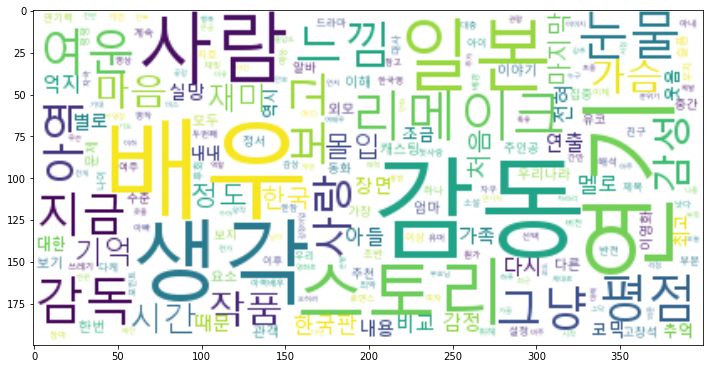

In [11]:
plt.figure(figsize=(12,8))
plt.imshow(wc_all, interpolation='bilinear')
plt.show()

### 긍정 리뷰 워드 클라우드

In [12]:
wc_pos = wc.generate_from_frequencies(pos_count)
pos_count.most_common(20)

[('감동', 33),
 ('연기', 20),
 ('배우', 18),
 ('사랑', 17),
 ('여운', 17),
 ('눈물', 16),
 ('일본', 15),
 ('생각', 15),
 ('스토리', 13),
 ('지금', 13),
 ('가슴', 13),
 ('보고', 13),
 ('사람', 12),
 ('리메이크', 11),
 ('기억', 10),
 ('한국판', 10),
 ('재미', 9),
 ('마음', 9),
 ('아역', 9),
 ('시간', 9)]

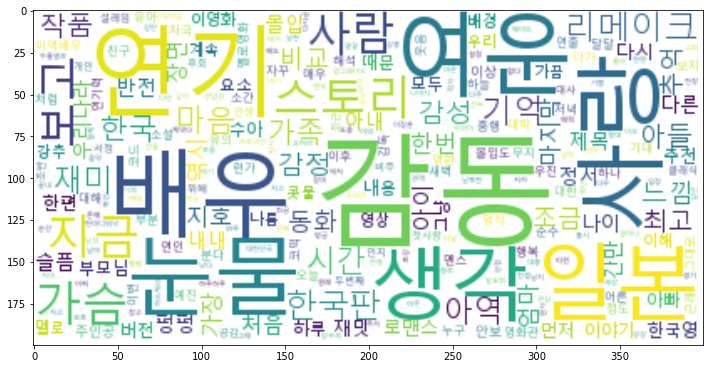

In [13]:
plt.figure(figsize=(12,8))
plt.imshow(wc_pos, interpolation='bilinear')
plt.show()

### 부정 리뷰 워드 클라우드

In [14]:
wc_neg = wc.generate_from_frequencies(neg_count)
neg_count.most_common(20)

[('배우', 32),
 ('연기', 24),
 ('생각', 22),
 ('평점', 21),
 ('감동', 20),
 ('감독', 20),
 ('그냥', 17),
 ('느낌', 14),
 ('사람', 14),
 ('리메이크', 13),
 ('일본', 12),
 ('스토리', 11),
 ('정도', 11),
 ('전혀', 10),
 ('억지', 10),
 ('몰입', 9),
 ('연출', 9),
 ('아역', 9),
 ('실망', 9),
 ('별로', 9)]

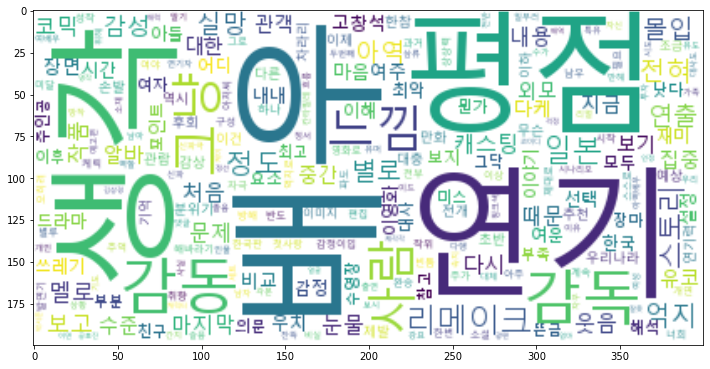

In [15]:
plt.figure(figsize=(12,8))
plt.imshow(wc_neg, interpolation='bilinear')
plt.show()

---

# 3번 나이브 베이즈

### 1번에서 완성시킨 evaluation_lists를 가져와 학습시킨다.

In [152]:
from nltk.tokenize import word_tokenize
import nltk
use_morph = False

In [153]:
def pos_tokenize(raw_sent):
    pos_sent = []
    
    sent = okt.pos(raw_sent, norm=True, stem=True)
    
    for tup in sent:
        word, tag = tup[0], tup[1]
        word_tag = word + '/' + tag
        pos_sent.append(word_tag)
    return ' '.join(pos_sent)

In [154]:
def make_word_dict(train, use_morph=False):
    all_words = set()
    
    for tup in train:
        sent, label = tup[0], tup[1]
        if use_morph: sent = pos_tokenize(sent)
        words = word_tokenize(sent)
        for word in words:
            all_words.add(word)
            
    return all_words

In [155]:
def make_train_feats(train, all_words, use_morph=False):
    train_features = []
    
    for tup in train:
        sent, label = tup[0], tup[1]
        if use_morph: sent = pos_tokenize(sent)
        words = word_tokenize(sent)
        tmp = {set_word: (set_word in words) for set_word in all_words}
        sent_tup = (tmp, label)
        train_features.append(sent_tup)
        
    return train_features

In [156]:
# print(evaluation_lists)

In [157]:
all_words = make_word_dict(evaluation_lists, use_morph)
print(len(all_words))
# print(all_words)

3273


In [158]:
train_features = make_train_feats(evaluation_lists, all_words, use_morph)
# print(train_features)

In [159]:
classifier = nltk.NaiveBayesClassifier.train(train_features)
print(classifier)

In [160]:
# classifier.show_most_informative_features(2000)

In [161]:
test_sent = "내취향은전혀아니다"

if use_morph: test_sent = pos_tokenize(test_sent)
words = word_tokenize(test_sent)
print(words)
test_feature = {set_word: (set_word in words) for set_word in all_words}
# print(test_feature)

classifier.classify(test_feature)

['내취향은전혀아니다']


'pos'